In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [3]:
#nltk.download('punkt')
data = pd.read_csv("D:/GPMT/Merged/JPN-1/data_joined_deu.csv", encoding = "utf-8")

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,24,25,27,34,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unnamed: 0,date,companyName,currency,language,countryName,distributorName,ageGroup,articleId,colors,...,CURRENT_PRICE_IN_EUR_OUTPUT,INITIAL_PRICE_IN_SELECTED_CURRENCY_OUTPUT,CURRENT_PRICE_IN_SELECTED_CURRENCY_OUTPUT,SELECTED_CURRENCY_OUTPUT,PRODUCT_INTRODUCTION_DATE_OUTPUT,DISCOUNTED_SINCE_OUTPUT,PRODUCT_EXIT_DATE_OUTPUT,PRODUCT_DESCRIPTION_OUTPUT,PRODUCT_URL_OUTPUT,IMAGE_SERVER_URL_OUTPUT
0,0,03/17/2016,adidas,JPY,ja-JP,jpn,own ecom,adults,AA0647,ホワイト,...,24.3,24.3,24.3,EUR,2/29/2016,9/18/2017,11/21/2017,3æ¬ç·ã®ãã¶ã¤ã³ãæ°ãããªã£ãã¬...,https://shop.adidas.jp/products/AA0647/,http://usporamap287.am.adsint.biz/zoomimages/1...
1,1,03/22/2016,adidas,JPY,ja-JP,jpn,own ecom,adults,AA0647,ホワイト,...,24.3,24.3,24.3,EUR,2/29/2016,9/18/2017,11/21/2017,3æ¬ç·ã®ãã¶ã¤ã³ãæ°ãããªã£ãã¬...,https://shop.adidas.jp/products/AA0647/,http://usporamap287.am.adsint.biz/zoomimages/1...
2,2,03/30/2016,adidas,JPY,ja-JP,jpn,own ecom,adults,AA0647,ホワイト,...,24.3,24.3,24.3,EUR,2/29/2016,9/18/2017,11/21/2017,3æ¬ç·ã®ãã¶ã¤ã³ãæ°ãããªã£ãã¬...,https://shop.adidas.jp/products/AA0647/,http://usporamap287.am.adsint.biz/zoomimages/1...
3,3,04/06/2016,adidas,JPY,ja-JP,jpn,own ecom,adults,AA0647,ホワイト,...,24.3,24.3,24.3,EUR,2/29/2016,9/18/2017,11/21/2017,3æ¬ç·ã®ãã¶ã¤ã³ãæ°ãããªã£ãã¬...,https://shop.adidas.jp/products/AA0647/,http://usporamap287.am.adsint.biz/zoomimages/1...
4,4,04/14/2016,adidas,JPY,ja-JP,jpn,own ecom,adults,AA0647,ホワイト,...,24.3,24.3,24.3,EUR,2/29/2016,9/18/2017,11/21/2017,3æ¬ç·ã®ãã¶ã¤ã³ãæ°ãããªã£ãã¬...,https://shop.adidas.jp/products/AA0647/,http://usporamap287.am.adsint.biz/zoomimages/1...


In [8]:
data.isnull().sum()

Unnamed: 0                                         0
date                                               0
companyName                                        0
currency                                           0
language                                           0
countryName                                        0
distributorName                                    0
ageGroup                                        2025
articleId                                          0
colors                                         30701
colorGroup                                     22128
consumerRating                                     0
currentPrice                                       0
description                                    32939
discountedSince                               957917
division                                           0
gender                                          2157
group                                         107530
imageUrl                                      

In [6]:
#data.key

In [6]:
data.columns

Index(['Unnamed: 0', 'date', 'companyName', 'currency', 'language',
       'countryName', 'distributorName', 'ageGroup', 'articleId', 'colors',
       'colorGroup', 'consumerRating', 'currentPrice', 'description',
       'discountedSince', 'division', 'gender', 'group', 'imageUrl',
       'initialPrice', 'modelNumber', 'name4', 'ped', 'pid', 'sportsCategory',
       'subBrand', 'technologies', 'type', 'url', 'key', 'COMPANY',
       'COUNTRY_OUTPUT', 'DISTRIBUTOR_OUTPUT', 'ARTICLE_ID_OUTPUT',
       'MODEL_NUMBER_OUTPUT', 'ARTICLE_NAME_OUTPUT', 'SUBBRAND_OUTPUT',
       'SPORTS_CATEGORY_OUTPUT', 'PRODUCT_DIVISION_OUTPUT',
       'PRODUCT_GROUP_OUTPUT', 'PRODUCT_TYPE_OUTPUT', 'FRANCHISE_OUTPUT',
       'TECHNOLOGIES_OUTPUT', 'COLOUR_GROUP_OUTPUT', 'COLOUR_OUTPUT',
       'GENDER_OUTPUT', 'AGE_GROUP_OUTPUT', 'CONSUMER_RATING_OUTPUT',
       'INITIAL_PRICE_IN_LOCAL_CURRENCY_OUTPUT',
       'CURRENT_PRICE_IN_LOCAL_CURRENCY_OUTPUT', 'LOCAL_CURRENCY_OUTPUT',
       'INITIAL_PRICE_IN_EUR_OUTP

In [7]:
unique_key = data.loc[:,['articleId', 'companyName', 'countryName', 'distributorName']]

In [8]:
unique_key = unique_key.drop_duplicates()

In [9]:
unique_key.index = np.arange(0,len(unique_key))

In [10]:
unique_key["Primary_Key"] = "ID_" + unique_key.index.astype(str)

In [11]:
unique_key.head()

,articleId,companyName,countryName,distributorName,Primary_Key
0,AA0647,adidas,jpn,own ecom,ID_0
1,AA0669,adidas,jpn,own ecom,ID_1
2,AA0670,adidas,jpn,own ecom,ID_2
3,AA2125,adidas,jpn,own ecom,ID_3
4,AA5629,adidas,jpn,own ecom,ID_4


In [12]:
len(data)

2008008

In [13]:
data = data.merge(unique_key, how='left', on=['articleId', 'companyName', 'countryName', 'distributorName'])

In [14]:
data["ID"] = "ID_" + data.index.astype(str)

In [15]:
data.language.unique()

array(['ja-JP'], dtype=object)

In [16]:
data.subBrand.unique()

array(['Performance', 'Originals', 'Porsche Design Sport', nan,
       'adidas by Stella McCartney', 'neo', 'Sportswear', 'NikeLab',
       'Classics', 'Sport Inspired', 'Sport inspired', 'sports inspired'],
      dtype=object)

In [17]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [18]:
#data.group.unique()

In [42]:
data_req = data.loc[:,["ID", "companyName", "description", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName", "SUBBRAND_OUTPUT"]]

In [43]:
#data_req = data_req.drop_duplicates()

In [44]:
len(data_req)

2008008

In [45]:
data_req_x = data_req.loc[:,["ID", "companyName", "description", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName"]]
data_req_y = data_req.loc[:, ["SUBBRAND_OUTPUT"]]

In [46]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [47]:
len(data_req)

2008008

In [48]:
data_req = data_req.dropna()

In [49]:
data_req = data_req.drop_duplicates()

In [50]:
data_req["description_output"]  = data_req["companyName"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["sportsCategory"] +" " + data_req["subBrand"]+" " + data_req["gender"]+" " + data_req["url"]+" " + data_req["sportsCategory"]+" " + data_req["ageGroup"]+" " + data_req["distributorName"]
# data_req["description"]  = data_req["description"]+" " + data_req["url"]

In [51]:
# data_req = data_req.drop(["companyName", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName"], axis = 1)
# data_req = data_req.drop(["url"], axis = 1)

In [52]:
#data_req.columns = ["description", "subBrand"]
data_req = data_req.rename(columns= {'subBrand' : 'subBrand_input', 'SUBBRAND_OUTPUT' : 'subBrand', 'description_output' : 'description', 'description' :'description_input'})

In [53]:
data_req.subBrand.unique()

array(['Performance', 'Sport Inspired'], dtype=object)

In [54]:
len(data_req)

2008008

In [55]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [56]:
# data_req = data_req.apply(lambda x: x.astype(str).str.lower())

In [57]:
# data_req["subBrand_input"] = "input_" + data_req["subBrand_input"].astype(str)
# data_req["division"] = "input_" + data_req["division"].astype(str)
# data_req["sportsCategory"] = "input_" + data_req["sportsCategory"].astype(str)
# data_req["gender"] = "input_" + data_req["gender"].astype(str)
# data_req["ageGroup"] = "input_" + data_req["ageGroup"].astype(str)
# data_req["distributorName"] = "input_" + data_req["distributorName"].astype(str)

In [58]:
# description = data_req.description
# subBrand = data_req.subBrand
# data_req = data_req.drop(["description"], axis=1)

In [59]:
# data_req = pd.concat([pd.get_dummies(data_req[col]) for col in data_req], axis=1)

In [60]:
# data_req = pd.concat([data_req, subBrand, description], axis=1)

In [61]:
data_req.subBrand.unique()

array(['performance', 'sport inspired'], dtype=object)

In [62]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(408.7274587551444, 274.1356321799272, 2629)

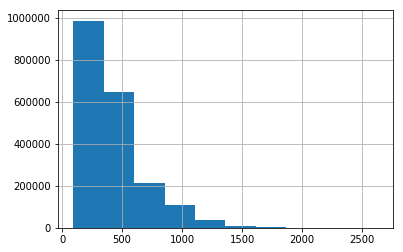

In [63]:
lens.hist();

In [64]:
data_req = data_req.dropna()

In [65]:
len(data_req)

2008008

In [66]:
one_hot = pd.get_dummies(data_req.subBrand)

In [67]:
label_cols = data_req.subBrand.dropna().unique()

In [68]:
label_cols

array(['performance', 'sport inspired'], dtype=object)

In [69]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [70]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [71]:
subBrand_drop

,index,subBrand


In [72]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [73]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [74]:
data_req.head()

,companyName,description_input,division,sportsCategory,subBrand_input,gender,url,ageGroup,distributorName,subBrand,description,performance,sport inspired
0,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,performance,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
1,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,performance,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
2,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,performance,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
3,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,performance,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
4,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,performance,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0


In [75]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [76]:
description = "description"

In [77]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [78]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [79]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [80]:
test_subBrand = test.subBrand

In [81]:
test_subBrand.head()

2     performance
4     performance
8     performance
12    performance
16    performance
Name: subBrand, dtype: object

In [82]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [83]:
#test.head()

In [84]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [85]:
from stop_words import get_stop_words
stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [86]:
#stop_words_english.append(stop_words_german)

In [87]:
#stop_words_english

In [88]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [89]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [90]:
trn_term_doc, test_term_doc

(<1405606x533610 sparse matrix of type '<class 'numpy.float64'>'
 	with 126175076 stored elements in Compressed Sparse Row format>,
 <602402x533610 sparse matrix of type '<class 'numpy.float64'>'
 	with 54054881 stored elements in Compressed Sparse Row format>)

In [9]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [10]:
x = trn_term_doc
test_x = test_term_doc

NameError: name 'trn_term_doc' is not defined

In [96]:
# train.head()

In [97]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [98]:
#x[1==0].sum(0)

In [99]:
# r = np.log(pr('1','0') / pr('0','1'))
#x_nb = x.multiply(r)
#np.hstack((x_nb, train.input_performance))
#x_nb.toarray

In [100]:
#y

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit performance
fit sport inspired


In [103]:
preds.shape

(602402, 2)

In [104]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [105]:
test.head()

,companyName,description_input,division,sportsCategory,subBrand_input,gender,url,ageGroup,distributorName,description,performance,sport inspired
2,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
4,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
8,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?brand...,adults,own ecom,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
12,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?itemC...,adults,own ecom,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0
16,adidas,3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シーンまで対応する...,アパレル,ランニング,Performance,male,http://shop.adidas.jp/pc/item/detail.cgi?itemC...,adults,own ecom,adidas 3本線のデザインが新しくなったレスポンスシリーズ。毎日のランニングから本番シー...,1,0


In [106]:
preds

array([[0.99998215, 0.02985793],
       [0.99998215, 0.02985793],
       [0.9999743 , 0.04205208],
       ...,
       [0.86925497, 0.86105599],
       [0.99512667, 0.1137149 ],
       [0.01297088, 0.99996392]])

#### Testing Data + Mapping

In [107]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [108]:
len(test)

602402

In [109]:
test = test.drop(label_cols, axis=1)

In [110]:
test.columns

Index(['companyName', 'description_input', 'division', 'sportsCategory',
       'subBrand_input', 'gender', 'url', 'ageGroup', 'distributorName',
       'description'],
      dtype='object')

In [111]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([test, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [112]:
submission.columns

Index(['companyName', 'description_input', 'division', 'sportsCategory',
       'subBrand_input', 'gender', 'url', 'ageGroup', 'distributorName',
       'description', 'performance', 'sport inspired'],
      dtype='object')

In [113]:
len(submission)

602402

In [114]:
submission = submission.rename(columns= {'description' : 'description_output', 'description_input' : 'description'})

In [115]:
#test_subBrand

In [116]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [117]:
final_pred.columns

Index(['companyName', 'description', 'division', 'sportsCategory',
       'subBrand_input', 'gender', 'url', 'ageGroup', 'distributorName',
       'description_output', 'performance', 'sport inspired', 'subBrand'],
      dtype='object')

In [118]:
#final_pred = submission

In [119]:
test_subBrand.str.lower().value_counts()

performance       343225
sport inspired    259177
Name: subBrand, dtype: int64

In [120]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [121]:
# from mlxtend.evaluate import confusion_matrix

# y_target =    final_pred.subBrand
# y_predicted = final_pred.Predictions

# cm = confusion_matrix(y_target=y_target, 
#                       y_predicted=y_predicted, 
#                       binary=False)

In [122]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
# import numpy as np

# fig, ax = plot_confusion_matrix(conf_mat=cm)
# plt.show()

In [123]:
#final_pred.head()

In [124]:
#final_pred.Predictions

In [125]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9954731225991945
F1 Score: 0.9953821073944695
Precision: 0.9955060909282377
Recall: 0.995259715847361


In [126]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [127]:
len(final_pred)

602402

In [128]:
#test_subBrand

In [129]:
final_pred.columns

Index(['companyName', 'description', 'division', 'sportsCategory',
       'subBrand_input', 'gender', 'url', 'ageGroup', 'distributorName',
       'description_output', 'performance', 'sport inspired', 'subBrand',
       'Predictions'],
      dtype='object')

In [130]:
chk = final_pred.merge(data, how="left", on = ["companyName", "description", "division","sportsCategory", "gender", "url", "ageGroup", "distributorName"])

In [131]:
len(chk)

5526837

In [54]:
#final_pred.isnull().sum()